In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def polynomial_dataframe(feature: pd.Series, degree: int):
    poly_df = pd.DataFrame()
    poly_df['power_1'] = feature

    if degree > 1:        
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)            
            poly_df[name] = feature**power

    return poly_df

path = 'data\kc_house_data.csv'
sales = pd.read_csv(path)
sales = sales.sort_values(['sqft_living','price'])

In [113]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [114]:
model1 = LinearRegression()
model1.fit(np.array(poly1_data['power_1']).reshape(-1,1), 
        np.array(poly1_data['price']).reshape(-1,1))

LinearRegression()

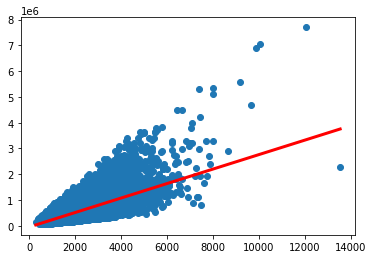

In [115]:
plt.scatter(poly1_data['power_1'], poly1_data['price'])
plt.plot(poly1_data['power_1'],
        model1.predict(np.array(poly1_data['power_1']).reshape(-1,1)),
        c='r', 
        linewidth=3)

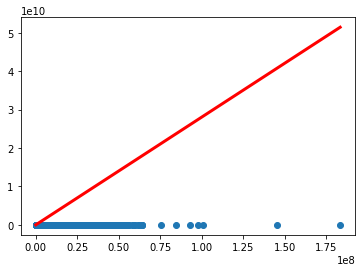

In [116]:
degree = 2

poly2_data = polynomial_dataframe(sales['sqft_living'], degree)
poly2_data['price'] = sales['price']

model2 = LinearRegression()
model2.fit(np.array(poly2_data['power_1']).reshape(-1,1), 
        np.array(poly2_data['price']).reshape(-1,1))

plt.scatter(poly2_data[f'power_{degree}'], poly2_data['price'])
plt.plot(poly2_data[f'power_{degree}'],
        model2.predict(np.array(poly2_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)

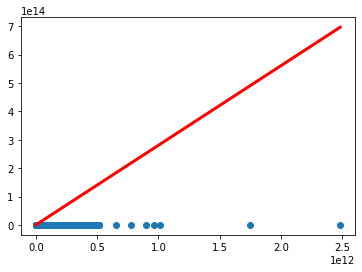

In [117]:
degree = 3

poly3_data = polynomial_dataframe(sales['sqft_living'], degree)
poly3_data['price'] = sales['price']

model3 = LinearRegression()
model3.fit(np.array(poly3_data['power_1']).reshape(-1,1), 
        np.array(poly3_data['price']).reshape(-1,1))

plt.scatter(poly3_data[f'power_{degree}'], poly3_data['price'])
plt.plot(poly3_data[f'power_{degree}'],
        model3.predict(np.array(poly3_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)

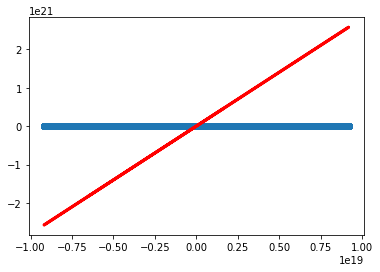

In [118]:
degree = 15

poly4_data = polynomial_dataframe(sales['sqft_living'], degree)
poly4_data['price'] = sales['price']

model4 = LinearRegression()
model4.fit(np.array(poly4_data['power_1']).reshape(-1,1), 
        np.array(poly4_data['price']).reshape(-1,1))

plt.scatter(poly4_data[f'power_{degree}'], poly4_data['price'])
plt.plot(poly4_data[f'power_{degree}'],
        model4.predict(np.array(poly4_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)

In [119]:
subset1 = pd.read_csv('data\wk3_kc_house_set_1_data.csv')
subset2 = pd.read_csv('data\wk3_kc_house_set_2_data.csv')
subset3 = pd.read_csv('data\wk3_kc_house_set_3_data.csv')
subset4 = pd.read_csv('data\wk3_kc_house_set_4_data.csv')

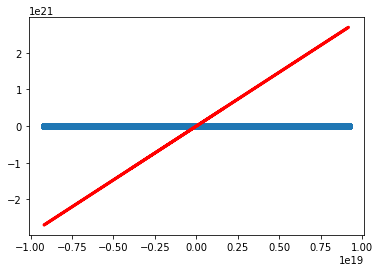

In [120]:
degree = 15

poly1_data = polynomial_dataframe(subset1['sqft_living'], degree)
poly1_data['price'] = subset1['price']

model1 = LinearRegression()
model1.fit(np.array(poly1_data['power_1']).reshape(-1,1), 
        np.array(poly1_data['price']).reshape(-1,1))

plt.scatter(poly1_data[f'power_{degree}'], poly1_data['price'])
plt.plot(poly1_data[f'power_{degree}'],
        model1.predict(np.array(poly1_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)

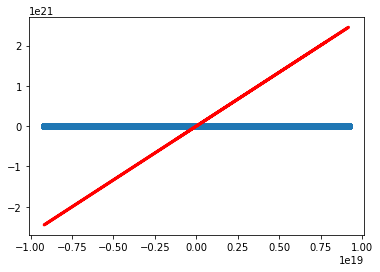

In [121]:
degree = 15

poly2_data = polynomial_dataframe(subset2['sqft_living'], degree)
poly2_data['price'] = subset2['price']

model2 = LinearRegression()
model2.fit(np.array(poly2_data['power_1']).reshape(-1,1), 
        np.array(poly2_data['price']).reshape(-1,1))

plt.scatter(poly2_data[f'power_{degree}'], poly2_data['price'])
plt.plot(poly2_data[f'power_{degree}'],
        model2.predict(np.array(poly2_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)

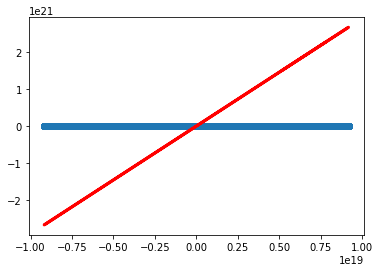

In [122]:
degree = 15

poly3_data = polynomial_dataframe(subset3['sqft_living'], degree)
poly3_data['price'] = subset3['price']

model3 = LinearRegression()
model3.fit(np.array(poly3_data['power_1']).reshape(-1,1), 
        np.array(poly3_data['price']).reshape(-1,1))

plt.scatter(poly3_data[f'power_{degree}'], poly3_data['price'])
plt.plot(poly3_data[f'power_{degree}'],
        model3.predict(np.array(poly3_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)

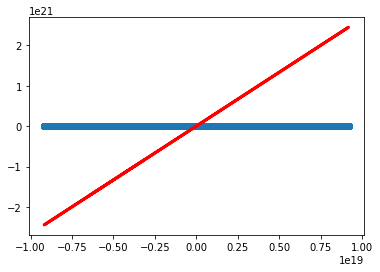

In [123]:
degree = 15

poly4_data = polynomial_dataframe(subset4['sqft_living'], degree)
poly4_data['price'] = subset4['price']

model4 = LinearRegression()
model4.fit(np.array(poly4_data['power_1']).reshape(-1,1), 
        np.array(poly4_data['price']).reshape(-1,1))

plt.scatter(poly4_data[f'power_{degree}'], poly4_data['price'])
plt.plot(poly4_data[f'power_{degree}'],
        model4.predict(np.array(poly4_data[f'power_{degree}']).reshape(-1,1)),
        c='r', 
        linewidth=3)